In [373]:
# Se importan bibliotecas de interes
import pandas as pd
import numpy as np
import datetime
import calendar
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from wordcloud import WordCloud

In [374]:
# Se carga el dataset "movies_metadata" en formato csv
df = pd.read_csv('..\\Datasets\movies_metadata.csv', low_memory=False) 

# Se revisa que se haya cargado correctamente
df.head(5)

id                        title release_date  release_year  \
0    862                    Toy Story   1995-10-30          1995   
1   8844                      Jumanji   1995-12-15          1995   
2  15602             Grumpier Old Men   1995-12-22          1995   
3  31357            Waiting to Exhale   1995-12-22          1995   
4  11862  Father of the Bride Part II   1995-02-10          1995   

  release_month      budget      revenue  return  popularity  vote_count  ...  \
0       octubre  30000000.0  373554033.0   12.45   21.946943      5415.0  ...   
1     diciembre  65000000.0  262797249.0    4.04   17.015539      2413.0  ...   
2     diciembre         0.0          0.0    0.00   11.712900        92.0  ...   
3     diciembre  16000000.0   81452156.0    5.09    3.859495        34.0  ...   
4       febrero         0.0   76578911.0    0.00    8.387519       173.0  ...   

             language_name runtime         genre_id  \
0              ['English']    81.0  [16, 35, 10751]   
1  ['English', 'Français']   104.0  [12, 14, 10751]   
2              ['English']   101.0      [10749, 35]   
3              ['English']   127.0  [35, 18, 10749]   
4              ['English']   106.0             [35]   

                           genre_name          company_id  \
0   ['Animation', 'Comedy', 'Family']                 [3]   
1  ['Adventure', 'Fantasy', 'Family']  [559, 2550, 10201]   
2               ['Romance', 'Comedy']       [6194, 19464]   
3      ['Comedy', 'Drama', 'Romance']               [306]   
4                          ['Comedy']        [5842, 9195]   

                                        company_name country_id  \
0                        ['Pixar Animation Studios']     ['US']   
1  ['TriStar Pictures', 'Teitler Film', 'Intersco...     ['US']   
2                 ['Warner Bros.', 'Lancaster Gate']     ['US']   
3         ['Twentieth Century Fox Film Corporation']     ['US']   
4   ['Sandollar Productions', 'Touchstone Pictures']     ['US']   

                   country_name  \
0  ['United States of America']   
1  ['United States of America']   
2  ['United States of America']   
3  ['United States of America']   
4  ['United States of America']   

                                           cast_name    director_name  
0  ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...    John Lasseter  
1  ['Robin Williams', 'Jonathan Hyde', 'Kirsten D...     Joe Johnston  
2  ['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...    Howard Deutch  
3  ['Whitney Houston', 'Angela Bassett', 'Loretta...  Forest Whitaker  
4  ['Steve Martin', 'Diane Keaton', 'Martin Short...    Charles Shyer  

[5 rows x 23 columns]

In [375]:
df.describe().round(2)

id  release_year        budget       revenue       return  \
count   45390.00      45390.00  4.539000e+04  4.539000e+04     45390.00   
mean   108019.72       1991.89  4.231336e+06  1.122664e+07       659.84   
std    112158.64         24.05  1.743732e+07  6.438033e+07     74681.77   
min         2.00       1874.00  0.000000e+00  0.000000e+00         0.00   
25%     26380.25       1978.00  0.000000e+00  0.000000e+00         0.00   
50%     59857.50       2001.00  0.000000e+00  0.000000e+00         0.00   
75%    156500.50       2010.00  0.000000e+00  0.000000e+00         0.00   
max    469172.00       2020.00  3.800000e+08  2.787965e+09  12396383.00   

       popularity  vote_count  vote_average   runtime  
count    45390.00    45390.00      45390.00  45144.00  
mean         2.93      110.07          5.62     94.17  
std          6.01      491.67          1.92     38.35  
min          0.00        0.00          0.00      0.00  
25%          0.39        3.00          5.00     85.00  
50%          1.13       10.00          6.00     95.00  
75%          3.69       34.00          6.80    107.00  
max        547.49    14075.00         10.00   1256.00

In [376]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['id', 'title', 'release_date', 'release_year', 'release_month',
       'budget', 'revenue', 'return', 'popularity', 'vote_count',
       'vote_average', 'original_language', 'language_id', 'language_name',
       'runtime', 'genre_id', 'genre_name', 'company_id', 'company_name',
       'country_id', 'country_name', 'cast_name', 'director_name'],
      dtype='object')>

In [377]:
df['runtime'].describe()

count    45144.000000
mean        94.171474
std         38.347785
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [378]:
# Se analiza pelicula con mayor score o popularidad
most_popular = df["popularity"].idxmax()
print(df.loc[most_popular][['id', 'title','release_year', 'return','vote_average']])

id               211672
title           Minions
release_year       2015
return            15.63
vote_average        6.4
Name: 30687, dtype: object


In [379]:
# Se analiza las 10 peliculas con mayor puntuacion 
top_scored = df.nlargest(10, 'vote_average')
print(top_scored[['id', 'title', 'release_year', 'vote_average']].to_string(index=False))

    id                                              title  release_year  vote_average
 58372                                           Reckless          1995          10.0
278939                               Girl in the Cadillac          1995          10.0
 73183           The Haunted World of Edward D. Wood, Jr.          1996          10.0
255546             Carmen Miranda: Bananas Is My Business          1995          10.0
 64562                           Other Voices Other Rooms          1995          10.0
 78373                              Dancer, Texas Pop. 81          1998          10.0
143750                                  The Farmer's Wife          2012          10.0
 89861                                   Stiff Upper Lips          1998          10.0
124853                                          Ten Benny          1995          10.0
 49477 Gendernauts: A Journey Through Shifting Identities          1999          10.0


In [380]:
# Se busca la descripcion del campo budget
stats = df['budget'].describe().round(2)
print (stats)

count    4.539000e+04
mean     4.231336e+06
std      1.743732e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64


In [381]:
#A partir de estos resultados se aprecia la necesidad de redefinir el valor
# del campo 'budget' para datos anomalos o con valores =0

# Se calcula la media del budget y se reemplazan los valores cero creando nueva columna
media = df['budget'].mean()
df['budget_mean'] = df['budget'].replace(0, media)

In [382]:
print(df['budget_mean'].describe())

count    4.539000e+04
mean     7.634118e+06
std      1.667580e+07
min      1.000000e+00
25%      4.231336e+06
50%      4.231336e+06
75%      4.231336e+06
max      3.800000e+08
Name: budget_mean, dtype: float64


In [383]:
df.describe()

id  release_year        budget       revenue        return  \
count   45390.000000  45390.000000  4.539000e+04  4.539000e+04  4.539000e+04   
mean   108019.723838   1991.885151  4.231336e+06  1.122664e+07  6.598392e+02   
std    112158.635262     24.053411  1.743732e+07  6.438033e+07  7.468177e+04   
min         2.000000   1874.000000  0.000000e+00  0.000000e+00  0.000000e+00   
25%     26380.250000   1978.000000  0.000000e+00  0.000000e+00  0.000000e+00   
50%     59857.500000   2001.000000  0.000000e+00  0.000000e+00  0.000000e+00   
75%    156500.500000   2010.000000  0.000000e+00  0.000000e+00  0.000000e+00   
max    469172.000000   2020.000000  3.800000e+08  2.787965e+09  1.239638e+07   

         popularity    vote_count  vote_average       runtime   budget_mean  
count  45390.000000  45390.000000  45390.000000  45144.000000  4.539000e+04  
mean       2.926400    110.069487      5.624166     94.171474  7.634118e+06  
std        6.009105    491.669661      1.915447     38.347785  1.667580e+07  
min        0.000000      0.000000      0.000000      0.000000  1.000000e+00  
25%        0.388850      3.000000      5.000000     85.000000  4.231336e+06  
50%        1.130746     10.000000      6.000000     95.000000  4.231336e+06  
75%        3.692197     34.000000      6.800000    107.000000  4.231336e+06  
max      547.488298  14075.000000     10.000000   1256.000000  3.800000e+08

(array([4.5384e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

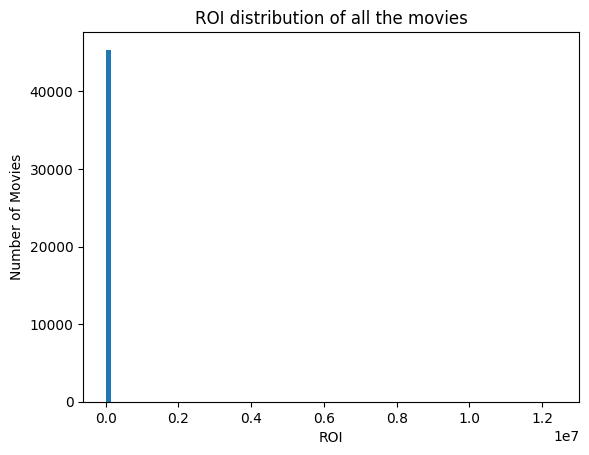

In [384]:
# Se analiza distribucion del ROI en todo el dataset
plt.xlabel('ROI')
plt.ylabel('Number of Movies')
plt.title('ROI distribution of all the movies')
plt.hist(df['return'], bins = 80)
#plt.xlim(0, 1e9)
#plt.ylim(0, 3500)
#plt.yscale('log')

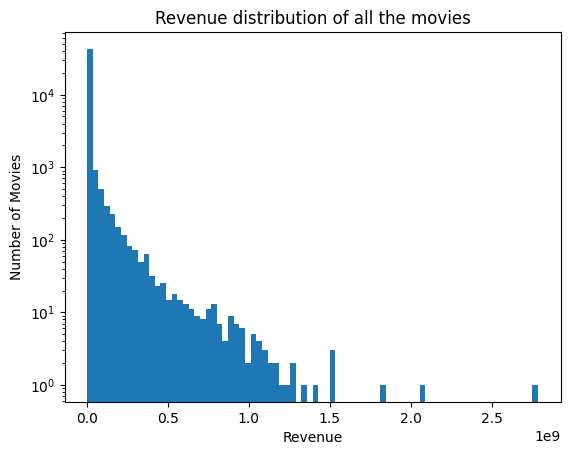

In [385]:
# Se analiza distribucion del revenue en todo el dataset
plt.xlabel('Revenue')
plt.ylabel('Number of Movies')
plt.title('Revenue distribution of all the movies')
plt.hist(df['revenue'], bins = 80)
#plt.xlim(0, 1e9)
#plt.ylim(0, 3500)
plt.yscale('log')

In [386]:
# Se concluye que la estrategia de reemplazar valores 0 con la media no funciona ya que,
#  altera considerablemente el dataset, mientras que la mediana y la moda son cero.
# Se elimina la columna generada 'budget_mean'
df.drop('budget_mean', axis=1, inplace=True)
# Se procede a  la eliminacion de las filas cuyo 'revenue' , 'budget' y 'return' sea cero
# ya que los tres parametros tienen alterado considerablemente su distribucion 
df.drop(df[(df['revenue'] == 0) | (df['budget'] == 0) | (df['return'] == 0)].index, inplace=True)
df.shape

(5319, 23)

In [387]:
df.describe().round(2)

id  release_year        budget       revenue       return  \
count    5319.00       5319.00  5.319000e+03  5.319000e+03      5319.00   
mean    60167.97       1999.69  3.134182e+07  9.137073e+07      5630.78   
std     95440.02         15.93  4.031652e+07  1.668199e+08    218116.25   
min         5.00       1915.00  1.000000e+00  1.000000e+00         0.01   
25%      8684.50       1994.00  5.205000e+06  7.542608e+06         0.83   
50%     14226.00       2004.00  1.700000e+07  3.047142e+07         2.09   
75%     59411.50       2011.00  4.000000e+07  1.005243e+08         4.28   
max    443319.00       2017.00  3.800000e+08  2.787965e+09  12396383.00   

       popularity  vote_count  vote_average  runtime  
count     5319.00     5319.00       5319.00  5318.00  
mean         9.84      739.77          6.28   109.93  
std         13.88     1256.81          0.92    22.01  
min          0.00        0.00          0.00     0.00  
25%          5.50       79.00          5.70    95.00  
50%          8.44      282.00          6.30   106.00  
75%         11.78      812.50          6.90   120.00  
max        547.49    14075.00          9.10   338.00

In [388]:
# Se analiza pelicula con mayor retorno (ROI)
most_roi = df["return"].idxmax()
print(df.loc[most_roi][['id', 'title','return','revenue', 'budget']])

id                  13703
title      Less Than Zero
return         12396383.0
revenue        12396383.0
budget                1.0
Name: 3999, dtype: object


In [389]:
# Se analiza las 20 peliculas con mayor retorno comparando su budget y revenue
top_ROI = df.nlargest(20, 'return')
print(top_ROI[['id', 'title', 'release_year', 'return', 'budget', 'revenue']].to_string(index=False))

    id                           title  release_year      return   budget     revenue
 13703                  Less Than Zero          1987 12396383.00      1.0  12396383.0
  3082                    Modern Times          1936  8500000.00      1.0   8500000.0
 14968           Welcome to Dongmakgol          2005  4197476.62      8.0  33579813.0
114903                  Aquí Entre Nos          2012  2755584.00      1.0   2755584.0
  8856         The Karate Kid, Part II          1986  1018619.28    113.0 115103979.0
 78383                       Nurse 3-D          2013  1000000.00     10.0  10000000.0
 50217              From Prada to Nada          2011    26881.72     93.0   2500000.0
 23827             Paranormal Activity          2007    12890.39  15000.0 193355800.0
  1435                       Tarnation          2003     5330.34    218.0   1162014.0
  2667         The Blair Witch Project          1999     4133.33  60000.0 248000000.0
363093 The Tiger: An Old Hunter's Tale          2015  

In [390]:
budget_mean = df['budget'].mean()
return_mean = df['return'].mean()
print(budget_mean, return_mean)


31341820.683775146 5630.776749388983


In [391]:
# En base a los resultados anteriores, y busqueda bibliografica,
#  se procede con estrategia para reemplazar los valores considerados outliers o inconsistentes
#  en los campos budget  y return (valores muy por debajo de las medias para ambos campos)
#  por consiguiente se tiene en cuenta estos parametros para eliminar los datos:
#23827 Paranormal Activity(2007) 'return': 12890.39
#1435  Tarnation (2003) 'budget': 218.0   

# Se filtran las filas que cumplen la condición y se elimninan
df = df.drop(df[df['budget'] < 218].index)
df = df.drop(df[df['return'] > 13000].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5276 entries, 0 to 45347
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5276 non-null   int64  
 1   title              5276 non-null   object 
 2   release_date       5276 non-null   object 
 3   release_year       5276 non-null   int64  
 4   release_month      5276 non-null   object 
 5   budget             5276 non-null   float64
 6   revenue            5276 non-null   float64
 7   return             5276 non-null   float64
 8   popularity         5276 non-null   float64
 9   vote_count         5276 non-null   float64
 10  vote_average       5276 non-null   float64
 11  original_language  5276 non-null   object 
 12  language_id        5276 non-null   object 
 13  language_name      5276 non-null   object 
 14  runtime            5275 non-null   float64
 15  genre_id           5276 non-null   object 
 16  genre_name         5276 non-

In [392]:
df.describe()

id  release_year        budget       revenue        return  \
count    5276.000000   5276.000000  5.276000e+03  5.276000e+03   5276.000000   
mean    60206.330553   1999.733131  3.159726e+07  9.208037e+07     10.136670   
std     95645.119398     15.876432  4.038068e+07  1.673045e+08    203.748697   
min         5.000000   1915.000000  2.180000e+02  4.000000e+00      0.010000   
25%      8618.750000   1994.000000  5.793275e+06  7.938157e+06      0.827500   
50%     14141.500000   2004.000000  1.700000e+07  3.100000e+07      2.090000   
75%     59437.000000   2011.000000  4.000000e+07  1.013425e+08      4.270000   
max    443319.000000   2017.000000  3.800000e+08  2.787965e+09  12890.390000   

        popularity    vote_count  vote_average      runtime  
count  5276.000000   5276.000000   5276.000000  5275.000000  
mean      9.887756    745.171911      6.284704   109.963602  
std      13.925151   1260.420534      0.910819    22.026069  
min       0.000657      0.000000      0.000000     0.000000  
25%       5.561993     81.000000      5.700000    95.000000  
50%       8.468635    286.000000      6.300000   106.000000  
75%      11.804164    826.000000      6.900000   120.000000  
max     547.488298  14075.000000      9.100000   338.000000

In [393]:
# Se analiza las 20 peliculas con mayor retorno comparando su budget y revenue
top_ROI = df.nlargest(20, 'return')
print(top_ROI[['id', 'title', 'release_year', 'return', 'budget', 'revenue']].to_string(index=False))

    id                           title  release_year   return    budget     revenue
 23827             Paranormal Activity          2007 12890.39   15000.0 193355800.0
  1435                       Tarnation          2003  5330.34     218.0   1162014.0
  2667         The Blair Witch Project          1999  4133.33   60000.0 248000000.0
363093 The Tiger: An Old Hunter's Tale          2015  2216.69    5000.0  11083449.0
   985                      Eraserhead          1977   700.00   10000.0   7000000.0
  9462           The Way of the Dragon          1972   653.85  130000.0  85000000.0
   692                  Pink Flamingos          1972   500.00   12000.0   6000000.0
  9372                   Super Size Me          2004   439.62   65000.0  28575078.0
299245                     The Gallows          2015   426.64  100000.0  42664410.0
    83                      Open Water          2004   420.52  130000.0  54667954.0
 30497    The Texas Chain Saw Massacre          1974   363.05   85000.0  308

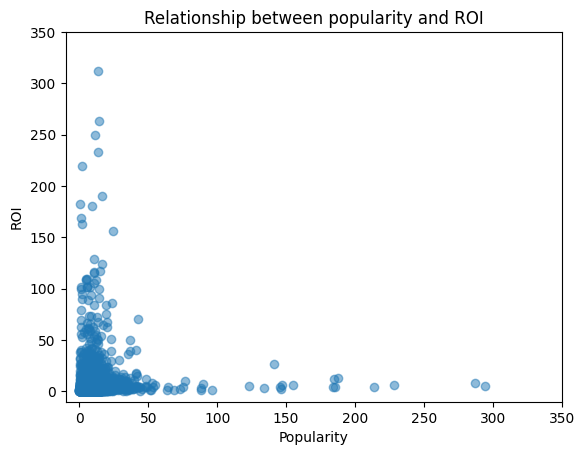

In [394]:
# Se analiza relacion entre popularidad y ROI
plt.xlabel('Popularity')
plt.ylabel('ROI')
plt.title('Relationship between popularity and ROI')
plt.scatter(df['popularity'], df['return'], alpha=0.5)
plt.xlim(-10, 350)
plt.ylim(-10, 350)
plt.show()

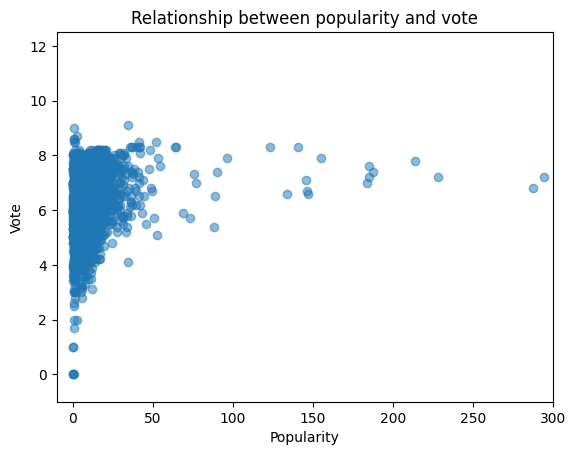

In [395]:
# Se analiza relacion entre popularidad y promedio de votos
plt.xlabel('Popularity')
plt.ylabel('Vote')
plt.title('Relationship between popularity and vote')
plt.scatter(df['popularity'], df['vote_average'], alpha=0.5)
plt.xlim(-10, 300)
plt.ylim(-1, 12.5)
plt.show()

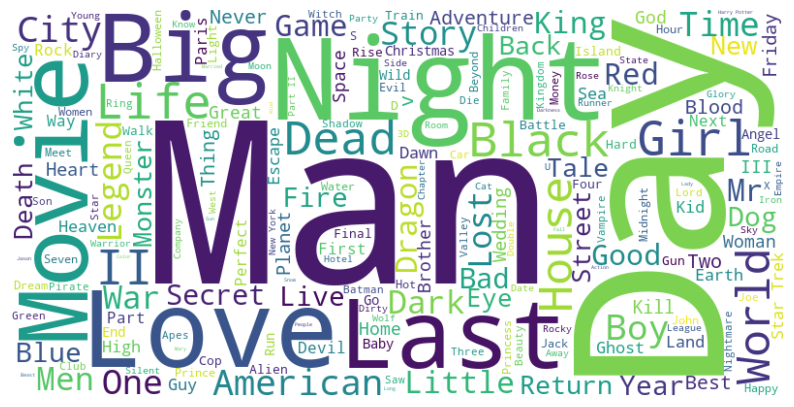

In [396]:
# A partir de la sugerencia se procede a la construccion de grafico 'nubes de palabras'
# para visualizar aquellas mas utilizadas en los titulos de peliculas del dataset

# Se unen todos los títulos en una sola cadena separada por espacios excluyendo nulos
text = ' '.join(df['title'].dropna().values)

# Se crea el objeto WordCloud con configuraciones opcionales
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Se muestra el gráfico de la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

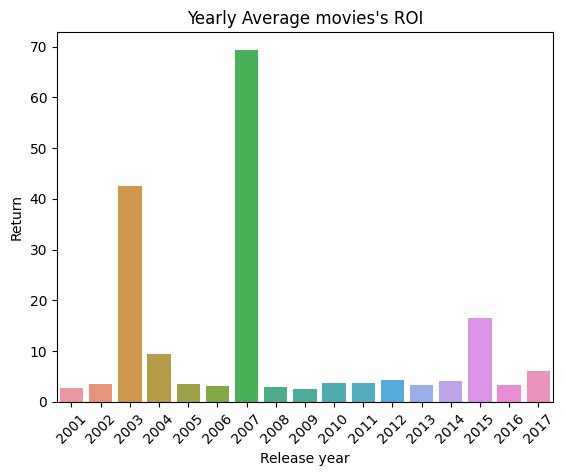

In [397]:
ROI_per_year = df[(df["release_year"] > 2000) & (df["release_year"] < 2020)].groupby("release_year").agg({"return": "mean"})

sns.barplot(x=ROI_per_year.index, y=ROI_per_year['return'])
plt.xlabel('Release year')
plt.xticks(rotation=45)
plt.ylabel('Return')
plt.title("Yearly Average movies's ROI")
plt.show()

In [398]:
ROI_2007 = df.loc[(df['release_year'] == 2007)  & (df['return'] > 300),
                ['id', 'title', 'release_year', 'return', 
                 'budget', 'revenue']].sort_values('return', ascending=False)
ROI_2007


id                title  release_year    return   budget  \
14204  23827  Paranormal Activity          2007  12890.39  15000.0   

           revenue  
14204  193355800.0

In [399]:
ROI_2003 = df.loc[(df['release_year'] == 2003) & (df['return'] > 300),
                ['id', 'title', 'release_year', 'return', 
                 'budget', 'revenue']].sort_values('return', ascending=False)
ROI_2003

id      title  release_year   return  budget    revenue
8217  1435  Tarnation          2003  5330.34   218.0  1162014.0

In [400]:
# Estos 2 casos coinciden con los criterios que se usaron anteriormente
#  para el tratamiento de outliers, y si bien son datos anomalos, serian 
# reales en base a la bibliografia consultada (exitos aislados).


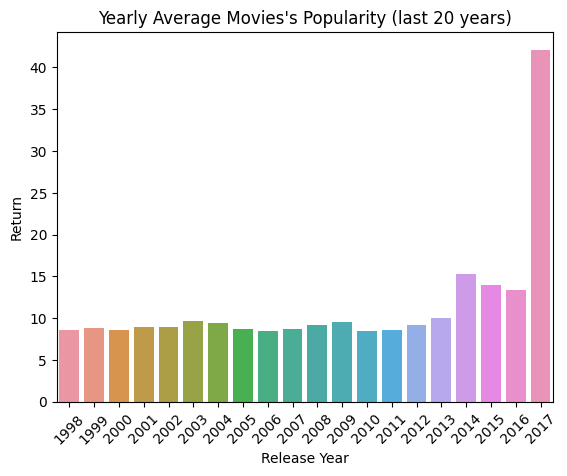

In [401]:
# Se analiza el promedio de popularidad anual de los ultimos 20 años 
per_year = df[(df["release_year"] > 1997) & (df["release_year"] < 2020)].groupby("release_year").agg({"popularity": "mean"})

sns.barplot(x=per_year.index, y=per_year['popularity'])
plt.xlabel('Release Year')
plt.xticks(rotation=45)
plt.ylabel('Return')
plt.title("Yearly Average Movies's Popularity (last 20 years)")
plt.show()

In [402]:
popular_2017 = df.loc[(df['release_year'] == 2017) & (df['popularity'] > 100),
                ['id', 'title', 'release_year', 'popularity', 'return', 
                 'budget', 'revenue']].sort_values('popularity', ascending=False)
popular_2017

id                                             title  release_year  \
33339  297762                                      Wonder Woman          2017   
42168  321612                              Beauty and the Beast          2017   
43584  339403                                       Baby Driver          2017   
26562  283995                    Guardians of the Galaxy Vol. 2          2017   
44210  281338                    War for the Planet of the Apes          2017   
26556  166426  Pirates of the Caribbean: Dead Men Tell No Tales          2017   

       popularity  return       budget       revenue  
33339  294.337037    5.51  149000000.0  8.205804e+08  
42168  287.253654    7.89  160000000.0  1.262886e+09  
43584  228.032744    6.60   34000000.0  2.245113e+08  
26562  185.330992    4.32  200000000.0  8.634161e+08  
44210  146.161786    2.43  152000000.0  3.699080e+08  
26556  133.827820    3.45  230000000.0  7.941920e+08

In [403]:
# Estas peliculas traccionan el indice popularidad del 2017 comparado con otros años

In [404]:
# Estimar el ranking de generos con mas peliculas

# Dividir las listas de géneros en valores individuales
genre_list = df['genre_name'].explode()

# Eliminar comillas y corchetes de cada género
genre_list = genre_list.str.strip("[]").str.replace("'", "")

# Dividir los géneros por espacios
genre_list = genre_list.str.split(", ")

# Crear una nueva lista de géneros individuales
individual_genres = [genre for sublist in genre_list for genre in sublist]

# Obtener el recuento de películas por género individual
genres_count = pd.Series(individual_genres).value_counts().reset_index()

# Renombrar las columnas del dataframe
genres_count.columns = ['genre', 'count']

# Mostrar el resultado como dataframe
genres_count


genre  count
0             Drama   2527
1            Comedy   1811
2          Thriller   1478
3            Action   1391
4           Romance    982
5         Adventure    948
6             Crime    848
7   Science Fiction    628
8            Horror    580
9            Family    525
10          Fantasy    504
11          Mystery    440
12        Animation    290
13          History    229
14              War    194
15            Music    187
16          Western     86
17      Documentary     56
18          Foreign     28
19                      11
20         TV Movie      1

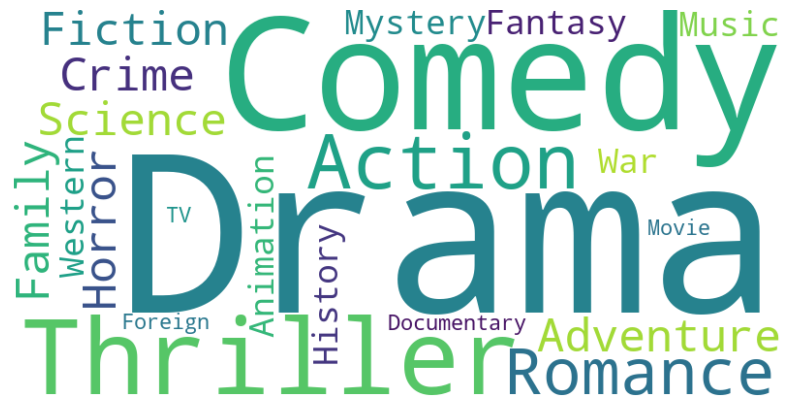

In [405]:
# Convertir la columna 'genero' en una cadena separada por espacios
genre_text = ' '.join(genres_count['genre'])

# Se crear el objeto WordCloud con configuraciones opcionales
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)

# Se muestra el gráfico de la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


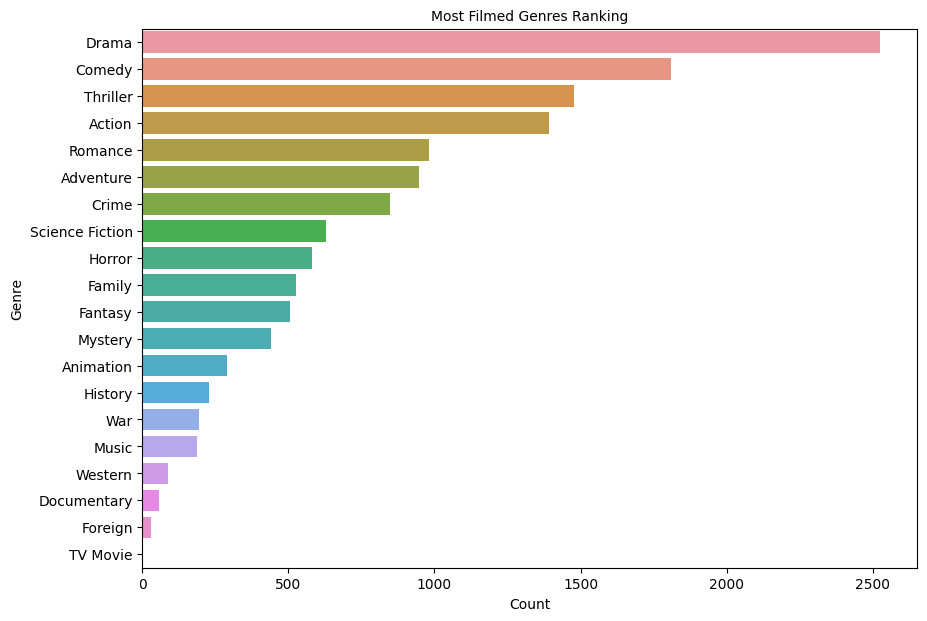

In [406]:
# Se analiza y visualiza la distibucion de produccion de peliculas segun el genero
# Datos de la tabla anterior genre vs count
data = {
    'genre': ['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime', 'Science Fiction', 'Horror', 'Family', 'Fantasy', 'Mystery', 'Animation', 'History', 'War', 'Music', 'Western', 'Documentary', 'Foreign', 'TV Movie'],
    'count': [2527, 1811, 1478, 1391, 982, 948, 848, 628, 580, 525, 504, 440, 290, 229, 194, 187, 86, 56, 28, 1]
}

# Se crea DataFrame a partir de los datos
df_genre = pd.DataFrame(data)

# Se genera el gráfico de barras 
plt.figure(figsize=(10, 7))
sns.barplot(y='genre', x='count', data=df_genre)
plt.title("Most Filmed Genres Ranking", fontsize=10)
plt.ylabel("Genre", fontsize=10)
#plt.yticks(rotation=90)
plt.xlabel("Count", fontsize=10)
plt.show()


In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5276 entries, 0 to 45347
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5276 non-null   int64  
 1   title              5276 non-null   object 
 2   release_date       5276 non-null   object 
 3   release_year       5276 non-null   int64  
 4   release_month      5276 non-null   object 
 5   budget             5276 non-null   float64
 6   revenue            5276 non-null   float64
 7   return             5276 non-null   float64
 8   popularity         5276 non-null   float64
 9   vote_count         5276 non-null   float64
 10  vote_average       5276 non-null   float64
 11  original_language  5276 non-null   object 
 12  language_id        5276 non-null   object 
 13  language_name      5276 non-null   object 
 14  runtime            5275 non-null   float64
 15  genre_id           5276 non-null   object 
 16  genre_name         5276 non-

In [408]:
# Se analizan los 20 actores con mas peliculas
import ast
# Se filtran los valores NaN en el campo 'cast_name'
cast_list = df['cast_name'].dropna()

# Se dividen las listas de actores en valores individuales
cast_list = cast_list.explode()

# Se convierte cada cadena en una lista de actores
cast_list = cast_list.apply(ast.literal_eval)

# Se crea una nueva lista de actores individuales
individual_cast = [actor for sublist in cast_list for actor in sublist]

# Se obtiene el recuento de películas por género individual
actors_count = pd.Series(individual_cast).value_counts().reset_index()

# Se renombra las columnas del dataframe
actors_count.columns = ['actor', 'count']

# Se muestra el top 20 de actores con más películas como dataframe
actors_count.head(20)


actor  count
0    Samuel L. Jackson     69
1       Robert De Niro     61
2         Bruce Willis     60
3       Morgan Freeman     55
4          Liam Neeson     50
5           Matt Damon     50
6         Nicolas Cage     50
7   Sylvester Stallone     48
8        Steve Buscemi     47
9         Willem Dafoe     47
10        John Goodman     45
11         Johnny Depp     45
12           Brad Pitt     44
13       Harrison Ford     43
14        J.K. Simmons     43
15      Julianne Moore     42
16         Owen Wilson     41
17           Tom Hanks     41
18         Keith David     40
19          Tom Cruise     40

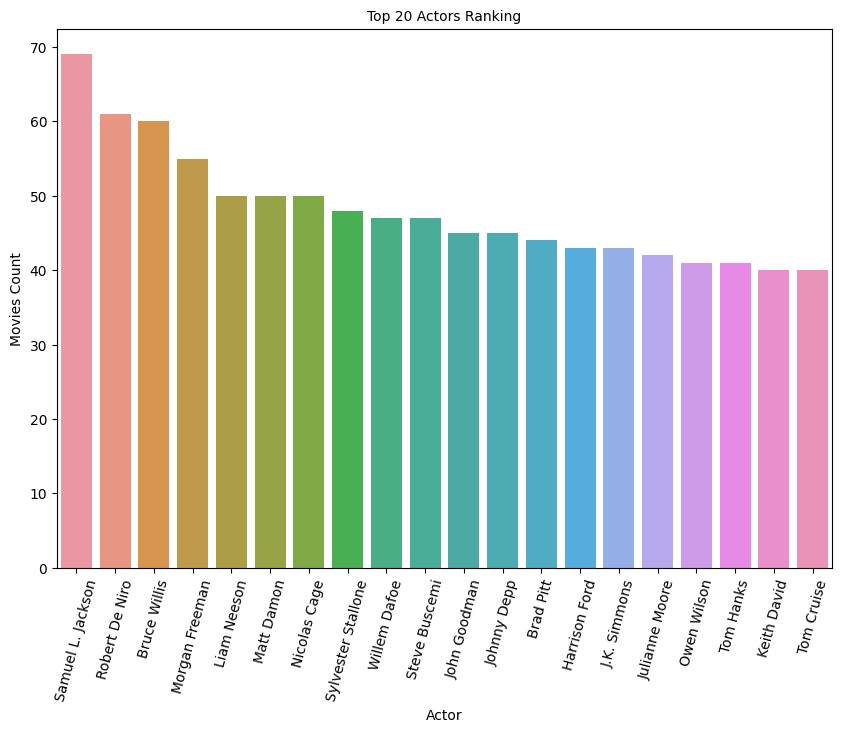

In [409]:
# Datos de la tabla de actores y conteo
data = {
    'actor': ['Samuel L. Jackson', 'Robert De Niro', 'Bruce Willis', 'Morgan Freeman', 'Liam Neeson', 'Matt Damon', 'Nicolas Cage', 'Sylvester Stallone', 'Willem Dafoe', 'Steve Buscemi', 'John Goodman', 'Johnny Depp', 'Brad Pitt', 'Harrison Ford', 'J.K. Simmons', 'Julianne Moore', 'Owen Wilson', 'Tom Hanks', 'Keith David', 'Tom Cruise'],
    'count': [69, 61, 60, 55, 50, 50, 50, 48, 47, 47, 45, 45, 44, 43, 43, 42, 41, 41, 40, 40]
}

# Se crea DataFrame a partir de los datos
df_actor = pd.DataFrame(data)

# Se genera el gráfico de barras
plt.figure(figsize=(10, 7))
sns.barplot(y='count', x='actor', data=df_actor)
plt.title("Top 20 Actors Ranking", fontsize=10)
plt.xlabel("Actor", fontsize=10)
plt.ylabel("Movies Count", fontsize=10)
plt.xticks(rotation=75)
plt.show()


C:\Users\David\AppData\Local\Temp\ipykernel_20476\1635796617.py:14: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1e10)
C:\Users\David\AppData\Local\Temp\ipykernel_20476\1635796617.py:15: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e10)


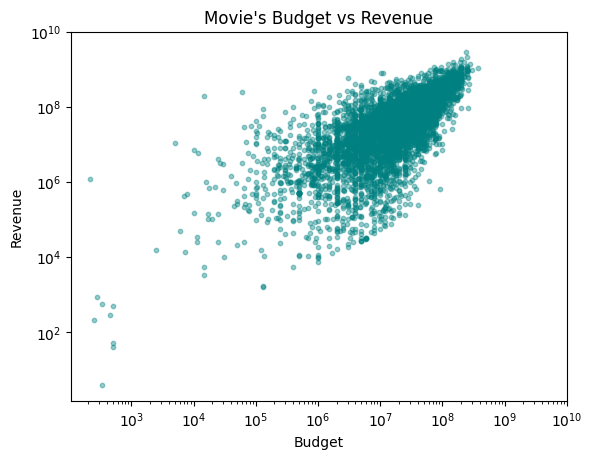

In [411]:
# Se analiza relacion entre budget y revenue
plt.scatter(df['budget'], df['revenue'], s=10, c='teal', alpha=0.4)
plt.title("Movie's Budget vs Revenue")
plt.xlabel('Budget', fontsize=10)
plt.ylabel('Revenue', fontsize=10)
plt.xscale('log')
plt.yscale('log')

# Calcular percentil 50 de los valores en los ejes x e y
x_percentile = np.percentile(df['budget'], 50)
y_percentile = np.percentile(df['revenue'], 50)
#plt.xlim(0.5 * x_percentile, 2 * x_percentile)
#plt.ylim(0.5 * y_percentile, 2 * y_percentile)
plt.xlim(0, 1e10)
plt.ylim(0, 1e10)
plt.show()


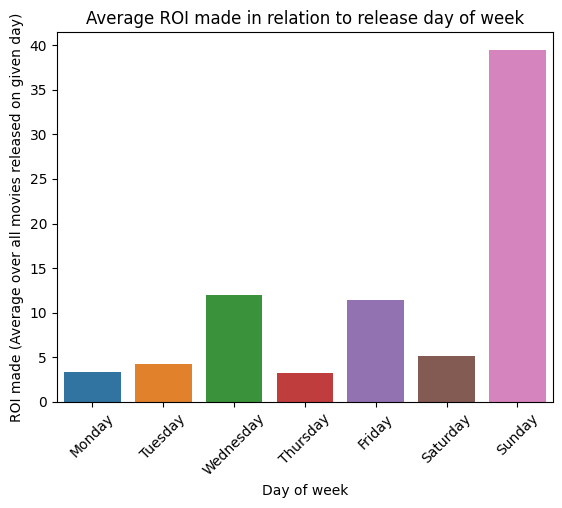

In [412]:
# Se analiza relacion entre retorno segun dia de la semana de estreno

# Se asegura conversion del campo 'release_date' a tipo fecha
df['release_date'] = pd.to_datetime(df['release_date'])
# Se crea la columna 'day_of_week' con el nombre del día de la semana
df['day_of_week'] = df['release_date'].dt.day_name()
# Se filtra el DataFrame para incluir solo los años mayores a 1990 en base a anterior grafico
df_filtered = df[df['release_year'] > 1990]
# Se calcula el retorno promedio agrupado por día de la semana
ROI_day = df_filtered.groupby('day_of_week')['return'].mean().reset_index()
# Se define el orden de los días de la semana
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Se procede a graficar 
sns.barplot(x='day_of_week', y='return', data=ROI_day, order=days)
plt.xlabel('Day of week')
plt.ylabel('ROI made (Average over all movies released on given day)')
plt.title('Average ROI made in relation to release day of week')
plt.xticks(rotation=45)
plt.show()


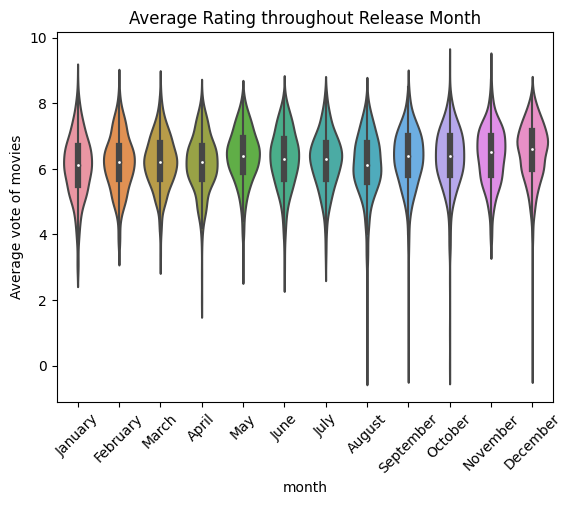

In [413]:
# Se analiza la relacion entre mes de estreno y votacion promedio
# Se define el orden de los meses para el eje x 
meses_orden_espanol = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
# Se define el diccionario para mapear los meses en español a inglés
meses_dict = {
    'enero': 'January',
    'febrero': 'February',
    'marzo': 'March',
    'abril': 'April',
    'mayo': 'May',
    'junio': 'June',
    'julio': 'July',
    'agosto': 'August',
    'septiembre': 'September',
    'octubre': 'October',
    'noviembre': 'November',
    'diciembre': 'December'
}
# Se genera el orden de los meses en inglés
meses_orden_ingles = [meses_dict[mes] for mes in meses_orden_espanol]
# Se genera el gráfico de violín
sns.violinplot(x='release_month', y='vote_average', data=df, order=meses_orden_espanol)
plt.title('Average Rating throughout Release Month')
plt.xlabel('month')
plt.xticks(ticks=range(len(meses_orden_espanol)),labels=meses_orden_ingles, rotation=45)
plt.ylabel('Average vote of movies')
plt.show()

C:\Users\David\AppData\Local\Temp\ipykernel_20476\4187949971.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e3)


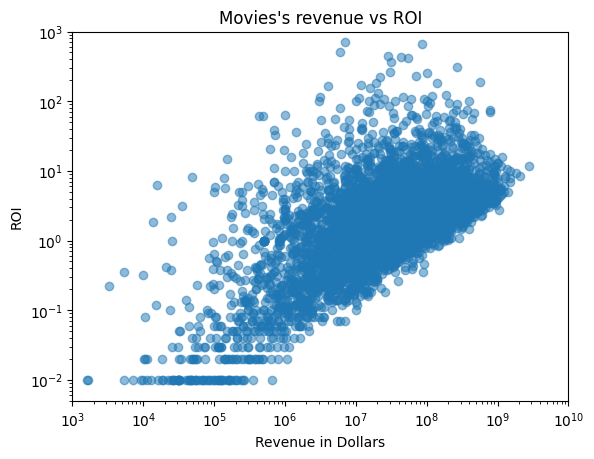

In [414]:
# Se analiza relacion entre budget y revenue
plt.scatter(df['revenue'], df['return'], alpha=0.5)
plt.xlabel('Revenue in Dollars')
plt.ylabel('ROI')
plt.title("Movies's revenue vs ROI")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e3, 1e10)
plt.ylim(0, 1e3)
plt.show()

In [415]:
df.columns.to_list


<bound method IndexOpsMixin.tolist of Index(['id', 'title', 'release_date', 'release_year', 'release_month',
       'budget', 'revenue', 'return', 'popularity', 'vote_count',
       'vote_average', 'original_language', 'language_id', 'language_name',
       'runtime', 'genre_id', 'genre_name', 'company_id', 'company_name',
       'country_id', 'country_name', 'cast_name', 'director_name',
       'day_of_week'],
      dtype='object')>

In [419]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5276 entries, 0 to 45347
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5276 non-null   int64         
 1   title              5276 non-null   object        
 2   release_date       5276 non-null   datetime64[ns]
 3   release_year       5276 non-null   int64         
 4   release_month      5276 non-null   object        
 5   budget             5276 non-null   float64       
 6   revenue            5276 non-null   float64       
 7   return             5276 non-null   float64       
 8   popularity         5276 non-null   float64       
 9   vote_count         5276 non-null   float64       
 10  vote_average       5276 non-null   float64       
 11  original_language  5276 non-null   object        
 12  language_id        5276 non-null   object        
 13  language_name      5276 non-null   object        
 14  runtime     

In [421]:
# Se eliminan registos con nulos
df.dropna(axis=0, inplace=True)

In [426]:
df = df[['id', 'title', 'release_year','budget', 'revenue', 'return', 
        'popularity', 'vote_count', 'vote_average', 'runtime', 'cast_name', 'director_name',
       'day_of_week']]

In [427]:
df.describe().round()

id  release_year       budget       revenue   return  popularity  \
count    5271.0        5271.0       5271.0  5.271000e+03   5271.0      5271.0   
mean    60104.0        2000.0   31624807.0  9.216660e+07     10.0        10.0   
std     95573.0          16.0   40389878.0  1.673604e+08    204.0        14.0   
min         5.0        1915.0        218.0  4.000000e+00      0.0         0.0   
25%      8605.0        1994.0    5800000.0  7.996520e+06      1.0         6.0   
50%     14113.0        2004.0   17000000.0  3.107021e+07      2.0         8.0   
75%     59159.0        2011.0   40000000.0  1.014680e+08      4.0        12.0   
max    443319.0        2017.0  380000000.0  2.787965e+09  12890.0       547.0   

       vote_count  vote_average  runtime  
count      5271.0        5271.0   5271.0  
mean        746.0           6.0    110.0  
std        1261.0           1.0     22.0  
min           0.0           0.0      0.0  
25%          82.0           6.0     95.0  
50%         286.0           6.0    106.0  
75%         826.0           7.0    120.0  
max       14075.0           9.0    338.0

c:\Users\David\Documents\HENRY\Data_Science\PI_ML\MLOps_Project_David_Nocera\venv\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\David\Documents\HENRY\Data_Science\PI_ML\MLOps_Project_David_Nocera\venv\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\David\Documents\HENRY\Data_Science\PI_ML\MLOps_Project_David_Nocera\venv\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\David\Documents\HENRY\Data_Science\PI_ML\MLOps_Project_David_Nocera\venv\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\David\Documents\HENRY\Data_Science\PI_ML\MLOps_Proj

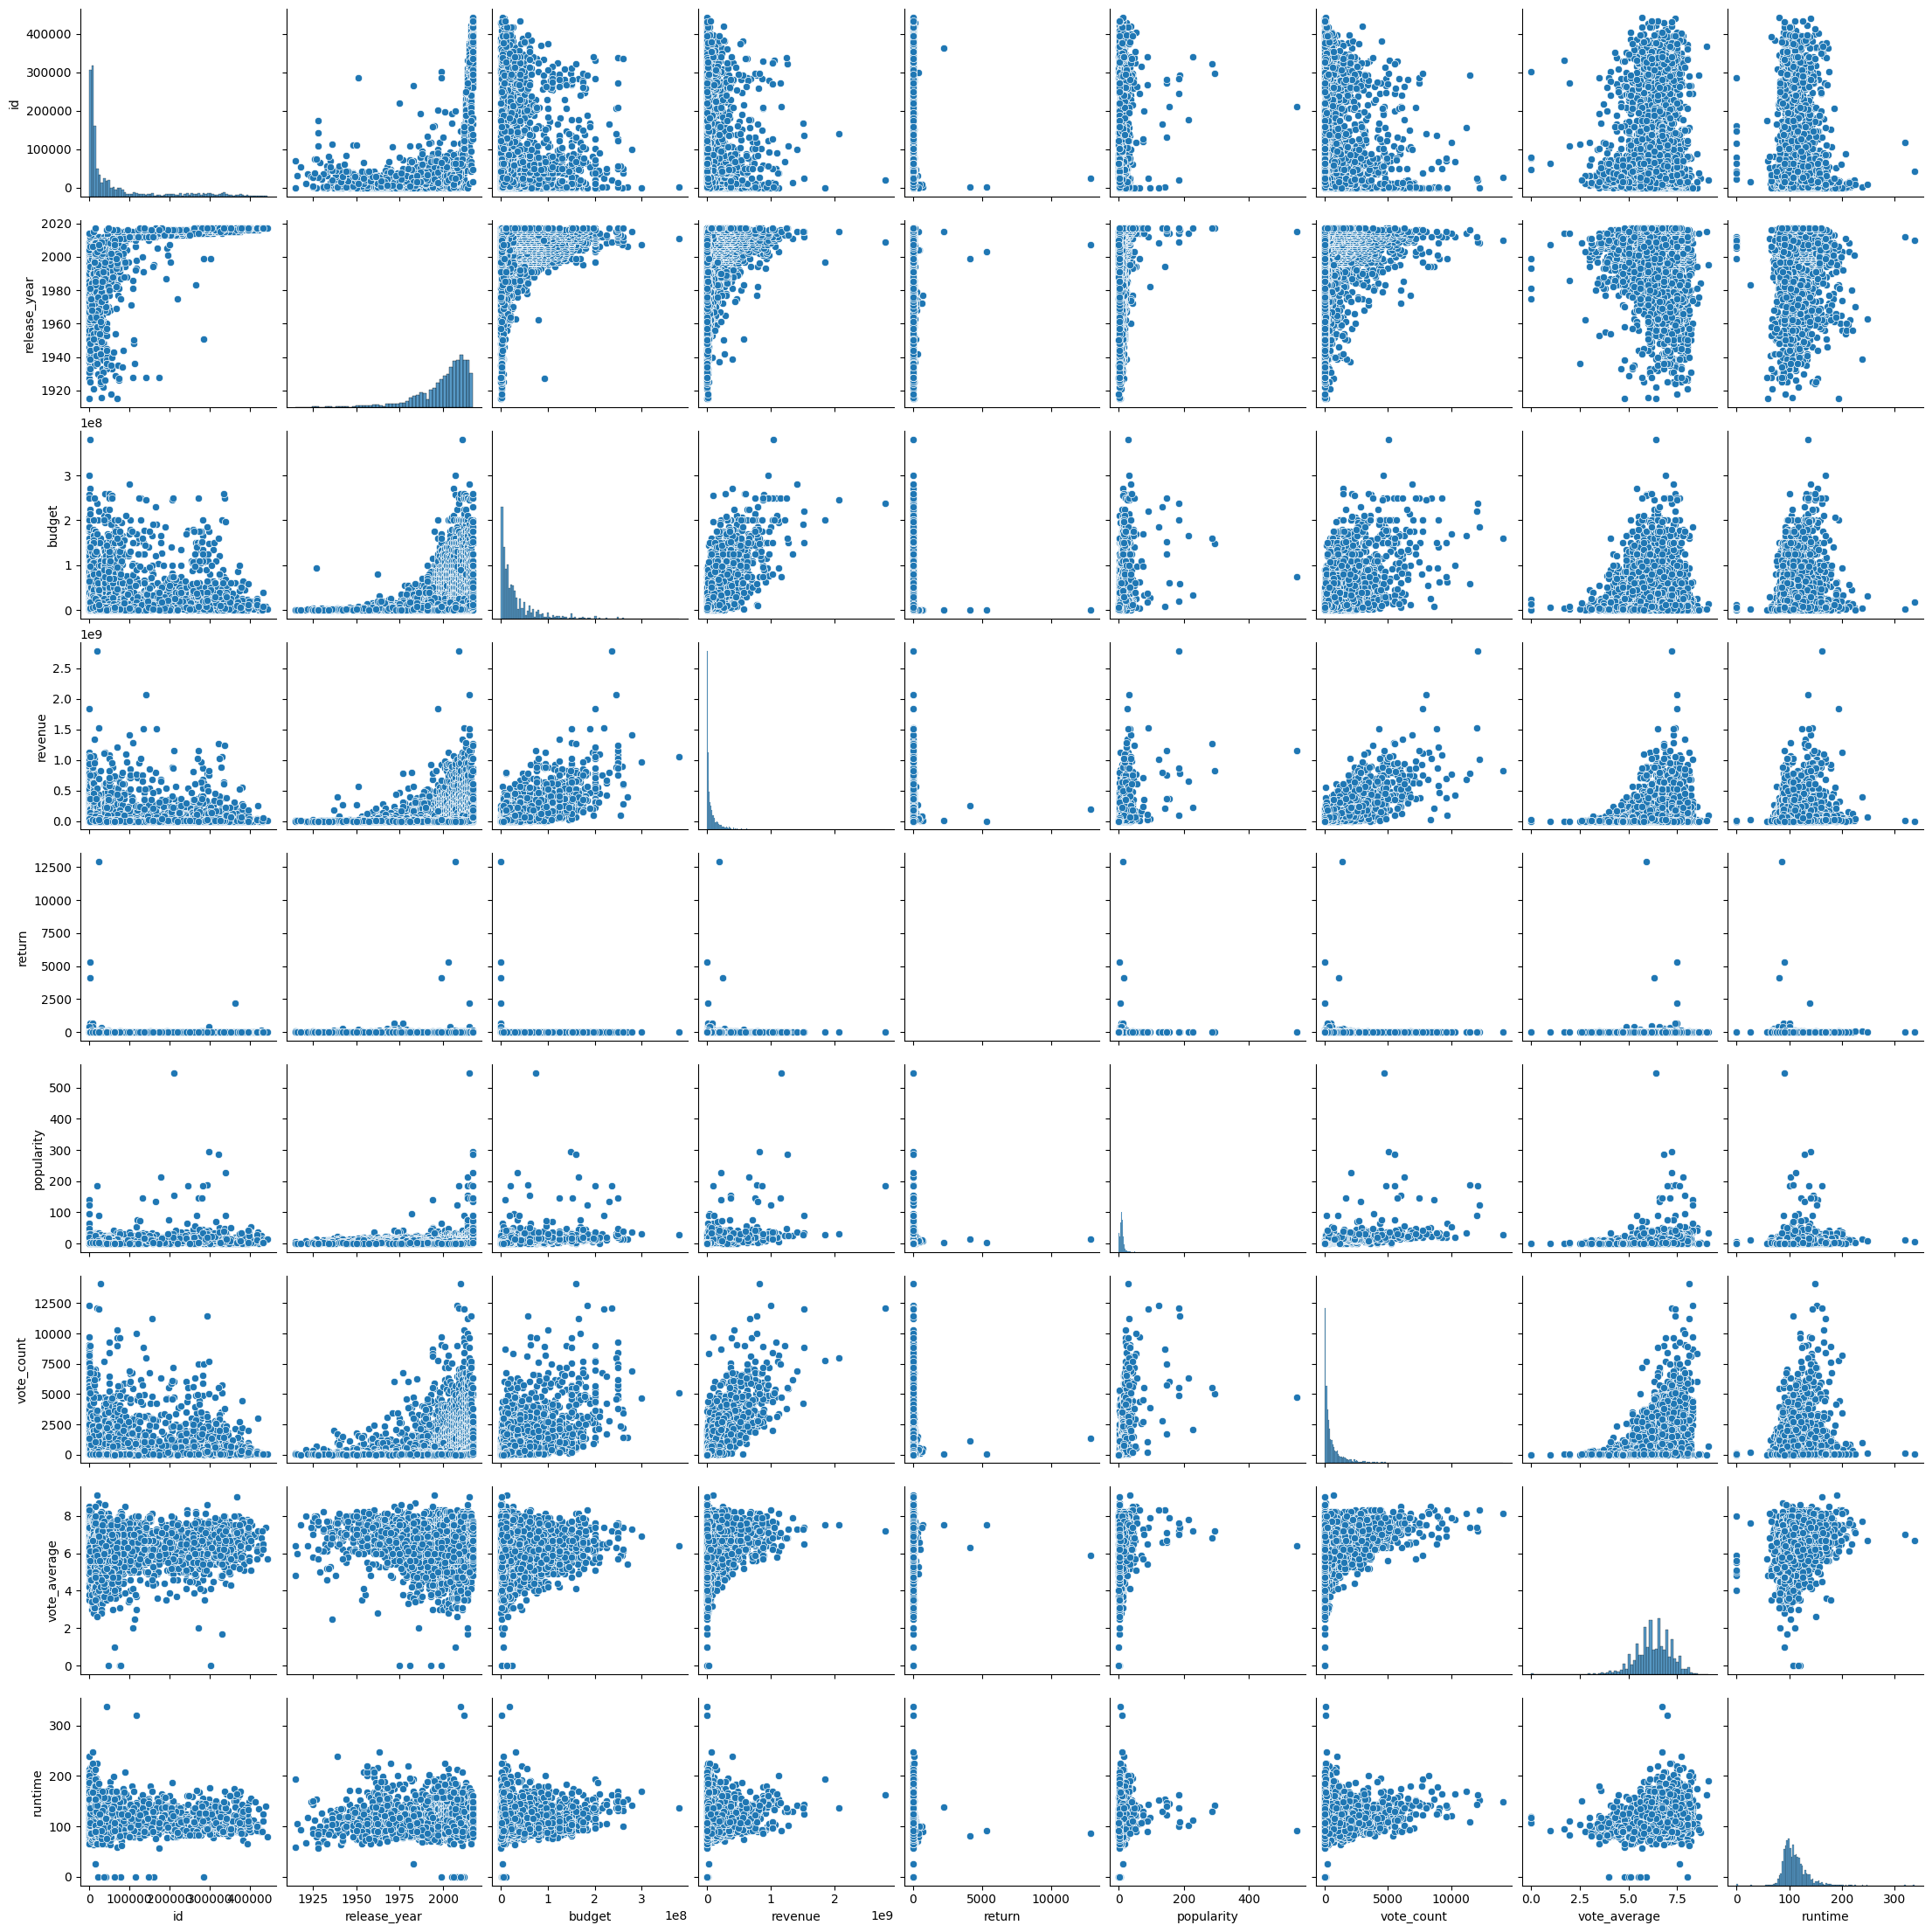

In [428]:
# Se analizan mediante pairplot todas las relaciones entre las variables cuantitativas del df
# ya que permitiria elegir las mejores variables predictoras para modelo MLOPs.
df_pairplot= df[['id', 'release_year', 'budget', 'revenue', 'return', 'popularity',
 'vote_count', 'vote_average', 'runtime',]]
sns.pairplot(df_pairplot, palette = ['r', 'b', 'g'])
plt.show()

In [429]:
# Se exporta dataset para ML
df.to_csv('movies_MLOps.csv', index=False)

In [430]:
# Se convierte csv a zip para poder montar MLOps

def compress_csv_to_zip(csv_filename, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        zipf.write(csv_filename)

# Se especifica el nombre del archivo CSV que deseas comprimir
csv_filename = 'movies_MLOps.csv'

# Se especifica el nombre del archivo ZIP resultante
zip_filename = 'movies_MLOps.zip'

# Se comprime el archivo CSV en ZIP
compress_csv_to_zip(csv_filename, zip_filename)